In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from our_mpeg import (
    compress_image,
    compress_image_with_reference,
    compress_image_with_dual_reference,
    decompress_image_with_dual_reference,
    decompress_image,
    load
)

In [5]:
example = load("/home/dashpole/Documents/lfv-compression/bottle.zip")

In [6]:
import os
import gzip

def append_compressed(filename, im1_offsets, im1_residuals_q):
    with gzip.open(filename, 'ab+') as f:
        np.save(f, np.array(im1_offsets, dtype=np.int8))
        np.save(f, np.array(im1_residuals_q))
        
#     with gzip.open(filename, 'rb') as f:
#         a = np.load(f)
#         b = np.load(f)
#         print("ERROR", np.linalg.norm(a - np.array(im1_offsets)), a.dtype)
#         print("ERROR", np.linalg.norm(b - np.array(im1_residuals_q)), b.dtype)
#         print(f.name)

# Compression with no reference

In [9]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0]):
    cur_img = example[t,0,0,:,:, :]

    a = compress_image(cur_img)
    with gzip.open(FILENAME, 'ab+') as f:
        np.save(f, np.array(a))

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 33878
Timestep 1 Size after zipping 67826
Timestep 2 Size after zipping 101885
Timestep 3 Size after zipping 135978
Timestep 4 Size after zipping 170129
Timestep 5 Size after zipping 204538
Timestep 6 Size after zipping 239326
Timestep 7 Size after zipping 274146
Timestep 8 Size after zipping 309151
Timestep 9 Size after zipping 344514
Timestep 10 Size after zipping 380045
Timestep 11 Size after zipping 415692
Timestep 12 Size after zipping 451586
Timestep 13 Size after zipping 487470
Timestep 14 Size after zipping 523451
Timestep 15 Size after zipping 559565
Timestep 16 Size after zipping 595717
Timestep 17 Size after zipping 631765
Timestep 18 Size after zipping 668001
Timestep 19 Size after zipping 704257
Timestep 20 Size after zipping 740602
Timestep 21 Size after zipping 777135
Timestep 22 Size after zipping 813593
Timestep 23 Size after zipping 850481
Timestep 24 Size after zipping 887488
Timestep 25 Size after zipping 924739
Timestep 26 Size after z

# Compression with prev as reference

In [10]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]

    a, b = compress_image_with_reference(next_img, prev_img)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 20220
Timestep 1 Size after zipping 48684
Timestep 2 Size after zipping 80184
Timestep 3 Size after zipping 113191
Timestep 4 Size after zipping 148437
Timestep 5 Size after zipping 183515
Timestep 6 Size after zipping 218889
Timestep 7 Size after zipping 255388
Timestep 8 Size after zipping 292556
Timestep 9 Size after zipping 330029
Timestep 10 Size after zipping 368992
Timestep 11 Size after zipping 409352
Timestep 12 Size after zipping 452550
Timestep 13 Size after zipping 497749
Timestep 14 Size after zipping 545280
Timestep 15 Size after zipping 594060
Timestep 16 Size after zipping 644621
Timestep 17 Size after zipping 696868
Timestep 18 Size after zipping 750929
Timestep 19 Size after zipping 806796
Timestep 20 Size after zipping 864610
Timestep 21 Size after zipping 924032
Timestep 22 Size after zipping 984675
Timestep 23 Size after zipping 1046320
Timestep 24 Size after zipping 1109923
Timestep 25 Size after zipping 1174826
Timestep 26 Size after

In [7]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]
    prev_img_2 = example[t+1,1,0,:,:]

    a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 22701
Timestep 1 Size after zipping 46873
Timestep 2 Size after zipping 71595
Timestep 3 Size after zipping 96570
Timestep 4 Size after zipping 121924
Timestep 5 Size after zipping 147130
Timestep 6 Size after zipping 172677
Timestep 7 Size after zipping 198138
Timestep 8 Size after zipping 223741
Timestep 9 Size after zipping 249573
Timestep 10 Size after zipping 275464
Timestep 11 Size after zipping 301595
Timestep 12 Size after zipping 327886
Timestep 13 Size after zipping 354091
Timestep 14 Size after zipping 380385
Timestep 15 Size after zipping 406690
Timestep 16 Size after zipping 432846
Timestep 17 Size after zipping 459019
Timestep 18 Size after zipping 485021
Timestep 19 Size after zipping 511034
Timestep 20 Size after zipping 537087
Timestep 21 Size after zipping 563326
Timestep 22 Size after zipping 589629
Timestep 23 Size after zipping 615542
Timestep 24 Size after zipping 641911
Timestep 25 Size after zipping 668155
Timestep 26 Size after zip

In [22]:
a

[[((0, 0), (0, 0)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),

In [12]:
next_img = example[1,0,0,:,:, :]
prev_img = example[0,0,0,:,:,:]
prev_img_2 = example[1,1,0,:,:]
a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)
im = decompress_image_with_dual_reference(a, b, prev_img, prev_img_2)

3390.6448

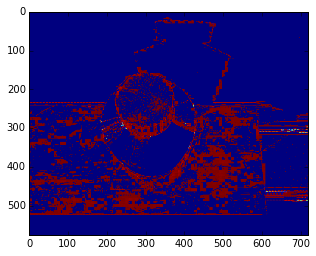

In [13]:
plt.imshow(im[:,:,0] - next_img[:,:,0])
np.linalg.norm(im[:,:,0].astype(np.float32) - next_img[:,:,0].astype(np.float32))